#**REINFORCEMENT LEARNING**
RL is an aspect of machine learning which lets an agent learn to make decisions(which we call as taking action), based on interaction with an environment.This mimics the fundamental way in which humans (and animals alike) learn. 

The steps of an RL agent:


1.   The agent observes an input state
2.   An action is determined by a decision making function (policy)
3.   The action is performed
4.   The agent receives a scalar reward or reinforcement from the environment
5.   Information about the reward given for that state / action pair is recorded

The goal of the agent is to improves upon its policy so as to maximise the reward obtained. 


An example of RL in nature is petting your dog. If the dog sits when you tell it to, you give some food as reward(positive reinforcement), If it growls at guests repeatedly, You scold it(negative reinforcement). 

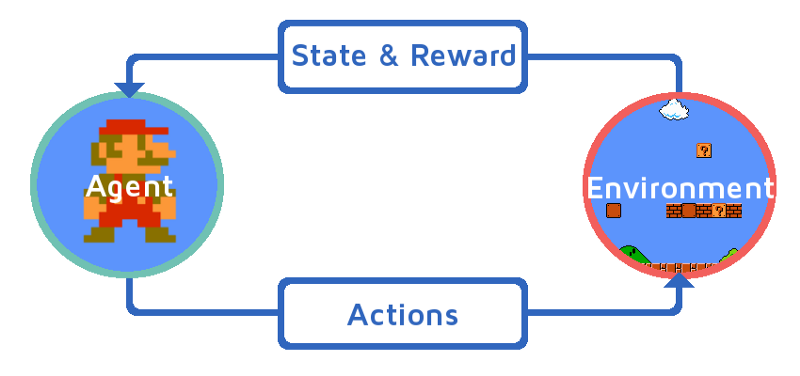

RL is powerfull because the agent learns without any supervision. SO it is particularly useful in complex problems like Games and automated Control systems.




##Understanding Exploration vs Exploitation with Bandits

Bandits is a classic problem in RL. The agent has to pick an action every time and recieve a reward based on the action picked. 

lets say we have 5 arms with  rewards following gaussian distribution with means [-2,2,4,7.5,8] and unit variance . If u knew the true mean reward beforehand u can always pick the action with highest reward, ie. 5th arm. But since u don't know anything initially, we have to estimate them sampling.

The simplest action selection rule is to select one of the actions with the highest estimated value, which is called greedy action.Greedy action selection always exploits current knowledge to maximize immediate reward; it spends no time at all sampling apparently inferior actions to see if they might really be better. Taking the greedy action is called EXPLOITATION.

let's say for the above setting our estimated mean values after some time are,[-2.4,1.8,4.2,7.6,7.2]. This is possible because rewards are from a distribution. Now if we choose to act greedily from now onwards we will choose action 4, however we can see that action 5 is actually better. So to ensure we have a good enough estimate we should EXPLORE more. 

But  We shouldn't explore too much because our goal is maximising the reward.Then how much should we explore or exploit? This dilemma continues into all RL. 

A very simple solution is what we call $\epsilon$-greedy. The idea is is to behave greedily most of the time, but every once in a while, say with small probability $\epsilon$ , instead select randomly from among all the actions with equal probability.

We test the greedy and $\epsilon$-greedy methods below.

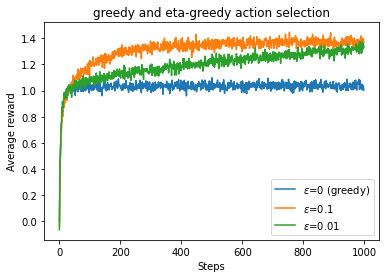

In [ ]:
#@title Multi armed bandits (Run the cell to view the graph,double click to view code)

import numpy as np
import matplotlib.pyplot as plt
import math

n_bandits = 2000
n_arms = 10
n_runs = 1000

all_qmeans = np.random.normal(0,1,(n_bandits,n_arms) )

def greedy(cumm_rewards):
    return np.argmax(cumm_rewards)
def greedy_random_tie(cumm_rewards):
    return np.random.choice(np.flatnonzero(cumm_rewards == cumm_rewards.max()))

def eta_greedy(cumm_rewards,eta):
    r = np.random.random()
    if r<eta :
        return np.random.choice(range(10))
    else:
        return np.random.choice(np.flatnonzero(cumm_rewards == cumm_rewards.max()))

avg_reward = np.zeros(n_runs)
opt_act_g = np.zeros(n_runs)
for i in range(n_bandits):
    # pick 10 values from standard normal 
    q_means = all_qmeans[i]
    #print(q_means)
    optimal_arm  = np.argmax(q_means)
    arm_rewards = np.zeros(10)
    arms_no_selected = np.zeros(10)
    for j in range(n_runs):
        selected_arm = greedy_random_tie(arm_rewards)
        reward = np.random.normal(q_means[selected_arm],1)
        avg_reward[j] = avg_reward[j] + (reward - avg_reward[j])/(i+1)
        arms_no_selected[selected_arm] +=1 
        arm_rewards[selected_arm] =   arm_rewards[selected_arm] + (reward - arm_rewards[selected_arm])/arms_no_selected[selected_arm]
        if selected_arm == optimal_arm :
            opt_act_g[j] +=1
        #print(selected_arm)
opt_act_g/=n_bandits

avg_reward_e = np.zeros(n_runs)
opt_act_e = np.zeros(n_runs)
for i in range(n_bandits):
    # pick 10 values from standard normal 
    q_means = all_qmeans[i]
    #print(q_means)
    optimal_arm  = np.argmax(q_means)
    arm_rewards = np.zeros(10)
    arms_no_selected = np.zeros(10)
    for j in range(n_runs):
        selected_arm = eta_greedy(arm_rewards,0.1)
        reward = np.random.normal(q_means[selected_arm],1)
        avg_reward_e[j] = avg_reward_e[j] + (reward - avg_reward_e[j])/(i+1)
        arms_no_selected[selected_arm] +=1 
        arm_rewards[selected_arm] =   arm_rewards[selected_arm] + (reward - arm_rewards[selected_arm])/arms_no_selected[selected_arm]
        if selected_arm == optimal_arm :
            opt_act_e[j] +=1
        #print(selected_arm)
opt_act_e/=n_bandits

avg_reward_e2 = np.zeros(n_runs)
opt_act_e2 = np.zeros(n_runs)
for i in range(n_bandits):
    # pick 10 values from standard normal 
    q_means = all_qmeans[i]
    #print(q_means)
    optimal_arm  = np.argmax(q_means)
    arm_rewards = np.zeros(10)
    arms_no_selected = np.zeros(10)
    for j in range(n_runs):
        selected_arm = eta_greedy(arm_rewards,0.01)
        reward = np.random.normal(q_means[selected_arm],1)
        avg_reward_e2[j] = avg_reward_e2[j] + (reward - avg_reward_e2[j])/(i+1)
        arms_no_selected[selected_arm] +=1 
        arm_rewards[selected_arm] =   arm_rewards[selected_arm] + (reward - arm_rewards[selected_arm])/arms_no_selected[selected_arm]
        if selected_arm == optimal_arm :
            opt_act_e2[j] +=1
        #print(selected_arm)
opt_act_e2/=n_bandits

plt.plot(range(n_runs),avg_reward,label = '$\epsilon$=0 (greedy)')
plt.plot(range(n_runs),avg_reward_e,label = '$\epsilon$=0.1')
plt.plot(range(n_runs),avg_reward_e2,label = '$\epsilon$=0.01')
plt.xlabel("Steps")
plt.ylabel('Average reward')
plt.legend()
plt.title("greedy and eta-greedy action selection")
plt.savefig("greedy-averageReward.png")

## Markov Decision Processes (MDP)

The MDP is a classical formalization of the RL problem we saw earlier. The environment is formalized as an MDP with many states (observable to the agent), where an action not just influence the current reward but also the next state, through it the next reward as well. Hence it is a sequential decision making system.  

In simple terms, the agent starts with some state, takes an action, gets a reward from the environment, and goes to a next state based on the action.
So the goodness of an action should be calculated not only based on current reward but also future rewards along the path.

Here is an example,

 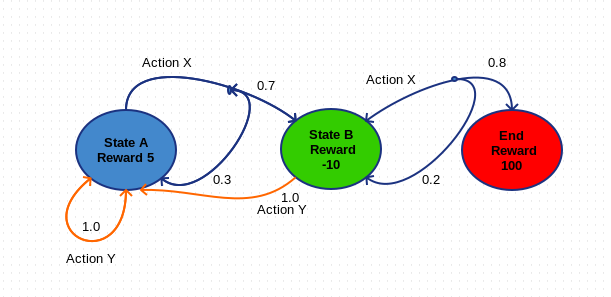

Here from state A the expected immediate reward if action X is taken, is -5.5.
However it is not a bad action because it allows to achieve a much higher reward by going into an end state.

MDP follows the Markov property, i.e. the transition to next state depends only the current state and action and regardless of any previous sequence of events(states or actions).

Mathematically MDPs are $(S,A,R,p)$, where S denotes set of states, A the actions,R the rewards and p gives the probability $P(s',r | s,a)$ .

In [ ]:
#@title Declaration of class MDP (Run the cell)
class MDP:

    """A Markov Decision Process, defined by an initial state, transition model,
    and reward function. We also keep track of a gamma value, for use by
    algorithms. The transition model is represented somewhat differently from
    the text. Instead of P(s' | s, a) being a probability number for each
    state/state/action triplet, we instead have T(s, a) return a
    list of (p, s') pairs. We also keep track of the possible states,
    terminal states, and actions for each state. [page 646]"""

    def __init__(self, init, actlist, terminals, transitions = {}, reward = None, states=None, gamma=.9):
        if not (0 < gamma <= 1):
            raise ValueError("An MDP must have 0 < gamma <= 1")

        if states:
            self.states = states
        else:
            ## collect states from transitions table
            self.states = self.get_states_from_transitions(transitions)
            
        self.N_states = len(self.states)
        self.init = init
        
        if isinstance(actlist, list):
            ## if actlist is a list, all states have the same actions
            self.actlist = actlist
        elif isinstance(actlist, dict):
            ## if actlist is a dict, different actions for each state
            self.actlist = actlist
        
        self.terminals = terminals
        self.transitions = transitions
        if self.transitions == {}:
            print("Warning: Transition table is empty.")
        self.gamma = gamma
        if reward:
            self.reward = reward
        else:
            self.reward = {s : 0 for s in self.states}
        #self.check_consistency()

    def R(self, state):
        """Return a numeric reward for this state."""
        return self.reward[state]

    def T(self, state, action):
        """Transition model. From a state and an action, return a list
        of (probability, result-state) pairs."""
        if(self.transitions == {}):
            raise ValueError("Transition model is missing")
        else:
            return self.transitions[state][action]

    def actions(self, state):
        """Set of actions that can be performed in this state. By default, a
        fixed list of actions, except for terminal states. Override this
        method if you need to specialize by state."""
        if state in self.terminals:
            return [None]
        else:
            return self.actlist

    def get_states_from_transitions(self, transitions):
        if isinstance(transitions, dict):
            s1 = set(transitions.keys())
            s2 = set([tr[1] for actions in transitions.values() 
                              for effects in actions.values() for tr in effects])
            return s1.union(s2)
        else:
            print('Could not retrieve states from transitions')
            return None

    def check_consistency(self):
        # check that all states in transitions are valid
        assert set(self.states) == self.get_states_from_transitions(self.transitions)
        # check that init is a valid state
        assert self.init in self.states
        # check reward for each state
        #assert set(self.reward.keys()) == set(self.states)
        assert set(self.reward.keys()) == set(self.states)
        # check that all terminals are valid states
        assert all([t in self.states for t in self.terminals])
        # check that probability distributions for all actions sum to 1
        for s1, actions in self.transitions.items():
            for a in actions.keys():
                s = 0
                for o in actions[a]:
                    s += o[0]
                assert abs(s - 1) < 0.001


class CustomMDP(MDP):
    def __init__(self, init, terminals, transition_matrix, reward = None, gamma=.9):
        # All possible actions.
        actlist = []
        for state in transition_matrix.keys():
            actlist.extend(transition_matrix[state])
        actlist = list(set(actlist))
        MDP.__init__(self, init, actlist, terminals, transition_matrix, reward, gamma=gamma)

    def T(self, state, action):
        if action is None:
            return [(0.0, state)]
        else: 
            return self.transitions[state][action]

# credits to https://github.com/aimacode/aima-python

In [ ]:
# We code the above MDP here.


# Transition Matrix as nested dict. State -> Actions in state -> List of (Probability, State) tuples
t = {
    "A": {
            "X": [(0.3, "A"), (0.7, "B")],
            "Y": [(1.0, "A")]
         },
    "B": {
            "X": {(0.8, "End"), (0.2, "B")},
            "Y": {(1.0, "A")}
         },
    "End": {}
}

init = "A"

terminals = ["End"]

rewards = {
    "A": 5,
    "B": -10,
    "End": 100
}


#instantize the above mdp

our_mdp = CustomMDP(init, terminals, t, rewards, gamma=0.8)

### Value functions and The Bellman Equations
---
value functions $V_\pi(s)$, are functions of states that estimate how good it is for the agent to be in a given state, while following a given policy $\pi$

Similarly action-value functions $Q_\pi(s,a)$ are functions  of state–action pairs that estimate how good it is to perform a given action in a given state, therefter following policy $\pi$. Note that policy is followed only from the next state.

Mathematically Value functions are expectations of average returns-
$$v_\pi (s) = E_\pi [G_t | S_t = s]$$
There is a natural (kind of recursive) relationship between the vallue function of a state and the value functions for all it's successor states. We call this the bellman equation. 

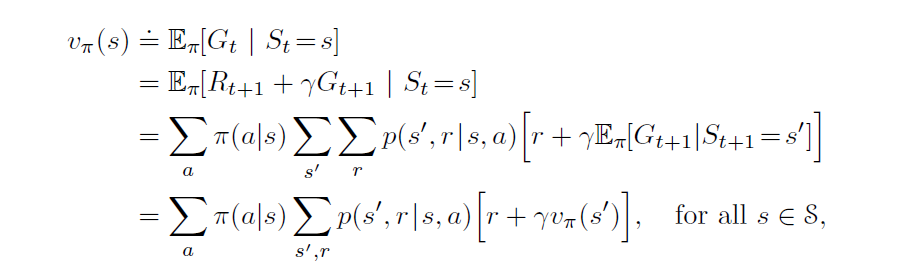

Where $p$ gives the probability of next step and reward given current state and action.

To easily understand this we can think of it as being Expectation of 2 parts, $r$ which gives the immediate reward obtained, and $\gamma V_\pi (S')$ which gives the delayed reward discounted by $\gamma$

####Bellman Optimality Equations: 
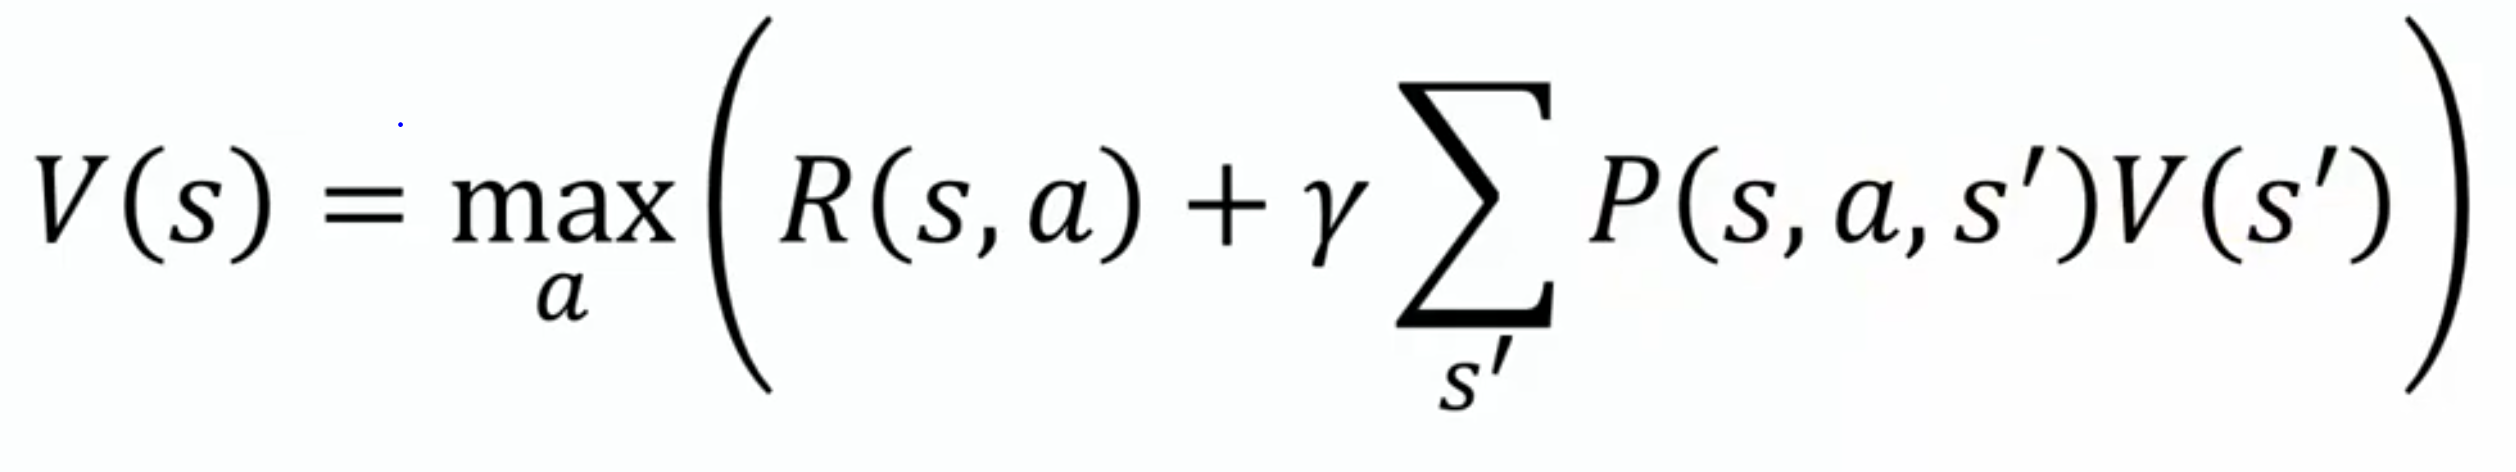

Intuitively, the Bellman optimality equation expresses the
fact that the value of a state under an optimal policy must equal the expected return for
the best action from that state

###Dynamic Programming and Iteration methods

The bellman equations give us N(S) number of simultaneous linear equations in N(S) variables and can be solved to give the $V_\pi$ values. Finding these values for a given policy is what we call **policy evaluation** (also prediction problem). 

However it is computationally tedius and hence we go for iterative methods. We choose an initial approximatio $V_0$ arbitarily, and then use bellman equation as an update rule to get successive approximations.
$$V_\pi ^{k+1}(s) = \sum_a \pi(a,s) \sum_{s',r} p(s',r | s,a) [r+ \gamma V_\pi^{k}(s')] $$

This is appropriately called iterative policy evaluation.

Our reason for computing the value function for a policy is to help find better policies.So we would like to improve upon the current policy. For a given state s, if it so happens that there exists action $a$ s.t. $q_\pi(s,a) >= v_\pi(s)$ ,  then we are better off performing action *a* at *s* than our current policy. That is, we should act greedy based on the action values.

We use precisely this idea in what is called **policy improvement**
$$\pi'(s) = \underset{a\in A}{\operatorname{argmax}} q_\pi(s,a) = \underset{a\in A}{\operatorname{argmax}}\sum_{s',r} p(s',r | s,a) [r+ \gamma V_{\pi}(s')]$$

Once a policy $\pi$, has been improved using $v_\pi$ to yield a better policy, $\pi'$ , we can then
compute $v_\pi'$ and improve it again to yield an even better $\pi''$ and so on. This process is called Policy iteration. 
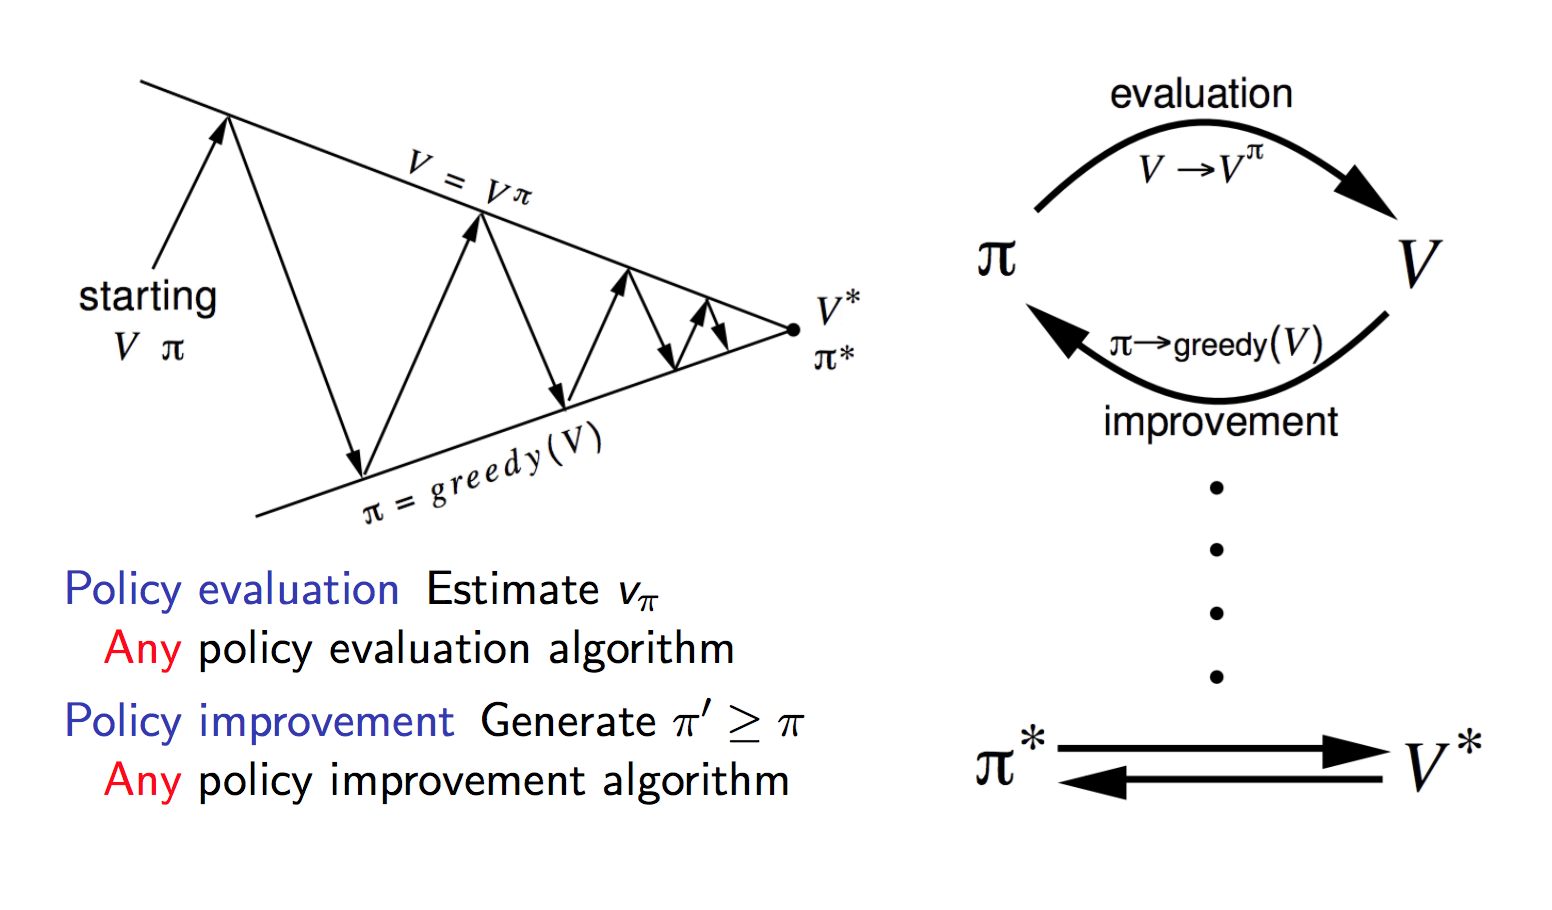

In [ ]:
#Policy Iteration

init_policy = {"A":{"X":1,"Y":0},"B":{"X":1,"Y":0}}
policy = init_policy 
from numpy import inf
value_changed = True

from numpy.linalg import norm
import numpy as np
V = {each:0 for each in our_mdp.states}
#for t in our_mdp.terminals:
#  V[t] = our_mdp.reward[t]
oldV = V.copy()

best_action = None
i=10
while value_changed:
  value_changed = False
  i-=1
  # policy evaluation
  err = 1
  while err>0.001: 
    for state in our_mdp.states:
      if state in our_mdp.terminals:
        continue
      V[state] =  0
      for a in our_mdp.actlist:
        trans = our_mdp.transitions[state][a]
        for each in trans:
          #print(state,a,each)
          V[state] += policy[state][a] * each[0]*(our_mdp.reward[each[1]]+our_mdp.gamma*oldV[each[1]])
    #print(V)
    err = norm(np.array(list(V.values()))-np.array(list(oldV.values())))/norm(np.array(list(oldV.values())))
    oldV = V.copy()

  if not best_action:
    best_action = {e:"X" for e in our_mdp.states }
    
  #policy improvement

  for state in our_mdp.states:
    if state in our_mdp.terminals:
      continue
    
    best_q = -inf
    for a in our_mdp.actlist:
      trans = our_mdp.transitions[state][a]
      q=0
      for each in trans:
        q += each[0]*(our_mdp.reward[each[1]]+our_mdp.gamma*oldV[each[1]])
      print(state,a,q)
      if q>best_q:
        best_q=q
        curr_best = a
    if best_action[state] != curr_best:
      best_action[state] = a
      value_changed = True
    policy[state] = {e:0 for e in our_mdp.actlist}
    policy[state][best_action[state]] =1
  print(policy)
 
    



A X 61.17666131664896
A Y 53.9226696769536
B X 92.85710297530369
B Y 53.9226696769536
{'A': {'X': 1, 'Y': 0}, 'B': {'X': 1, 'Y': 0}}


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in double_scalars


Above we implement policy iteration algorithm for the MDP introduced earlier. The given MDP is a simple one,but very interesting as well. A look will tell us that it seems the agent will try to go to the end state, because of the high reward. But is it that simple though? What if our agent wants to stay in state A and take action Y, so as to reap +5 reward for eternity. This may be better than getting 100 in one go and be done (assuming 0 return after reaching end state).  

The discount factor $\gamma$ is the key here, and the optimal policy will depend on it. If $\gamma>0.95$, then the ultimate policy will be to stay in state A. Same is also true for a value any lesser than bit less than 0.3. However in between these values the agent tries to reach the end.

This shows how crucial the discount factor can be when we try to pose a RL problem. 